<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week3_Day5_MiniProject_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_excel('/content/US Superstore data.xls')

In [4]:
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [3]:
# Check for missing values in 'State' and 'Sales'
print(df[['State', 'Sales']].isnull().sum())

# Convert 'Sales' to numeric if not already
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Drop rows where 'State' or 'Sales' are missing (optional)
df = df.dropna(subset=['State', 'Sales'])


State    0
Sales    0
dtype: int64


In [5]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)


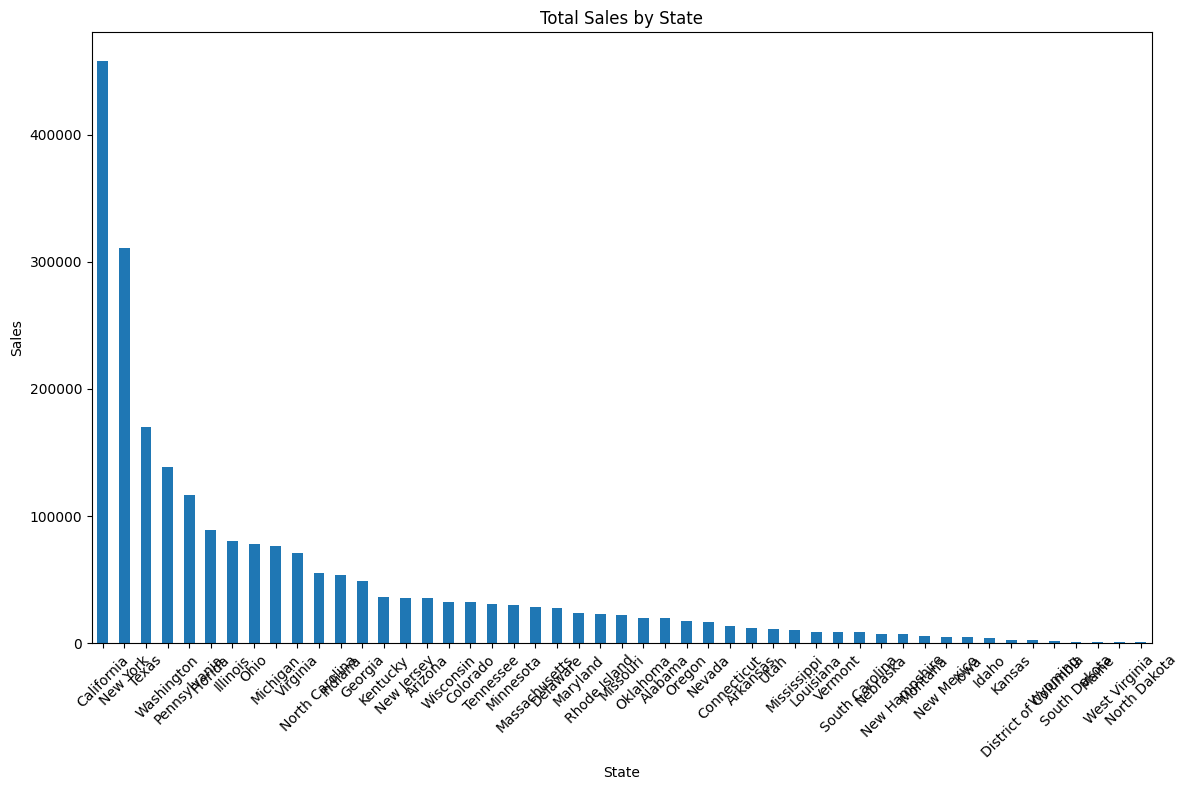

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sales_by_state.plot(kind='bar')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Filter data for New York and California
states_data = df[df['State'].isin(['New York', 'California'])]
comparison = states_data.groupby('State')[['Sales', 'Profit']].sum()
print(comparison)


                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


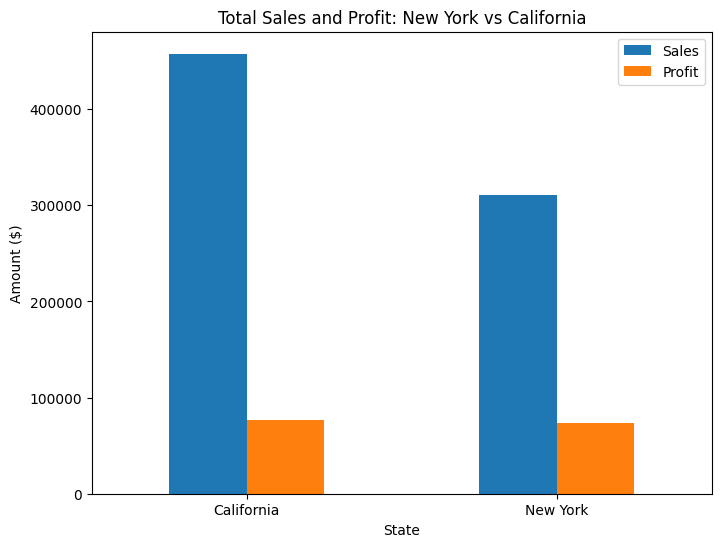

In [9]:
comparison.plot(kind='bar', figsize=(8,6))
plt.title('Total Sales and Profit: New York vs California')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Filter data for New York customers only
ny_customers = df[df['State'] == 'New York']

# Group by Customer Name and sum Sales (or Profit)
customer_sales = ny_customers.groupby('Customer Name')['Sales'].sum()

# Find the customer with the highest sales
outstanding_customer = customer_sales.idxmax()
highest_sales = customer_sales.max()

print(f"The outstanding customer in New York based on sales is: {outstanding_customer} with total sales of ${highest_sales:.2f}")


The outstanding customer in New York based on sales is: Tom Ashbrook with total sales of $13723.50


In [11]:
# Aggregate total profit by state
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

# Display the results
print(profit_by_state)


State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

In [12]:
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
#Calculate the cumulative profit percentage
total_profit = customer_profit.sum()
cumulative_profit = customer_profit.cumsum()  # cumulative sum of profits
cumulative_profit_percent = cumulative_profit / total_profit * 100

In [13]:
#Find the top 20% customers
num_customers = len(customer_profit)
top_20_percent_count = int(num_customers * 0.20)

In [14]:
# Check what percentage of profit the top 20% customers contribute
profit_top_20_percent = customer_profit.iloc[:top_20_percent_count].sum()
percent_contribution = (profit_top_20_percent / total_profit) * 100

print(f"Top 20% of customers contribute {percent_contribution:.2f}% of total profit.")

Top 20% of customers contribute 81.43% of total profit.


In [15]:
# Aggregate total sales and profit by city
city_stats = df.groupby('City')[['Sales', 'Profit']].sum()


In [16]:
# Top 20 cities by Sales
top20_sales_cities = city_stats.sort_values(by='Sales', ascending=False).head(20)

# Top 20 cities by Profit
top20_profit_cities = city_stats.sort_values(by='Profit', ascending=False).head(20)


In [17]:
print("Top 20 Cities by Sales:")
print(top20_sales_cities)

print("\nTop 20 Cities by Profit:")
print(top20_profit_cities)


Top 20 Cities by Sales:
                     Sales      Profit
City                                  
New York City  256368.1610  62036.9837
Los Angeles    175851.3410  30440.7579
Seattle        119540.7420  29156.0967
San Francisco  112669.0920  17507.3854
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
Chicago         48539.5410  -6654.5688
San Diego       47521.0290   6377.1960
Jacksonville    44713.1830  -2323.8350
Springfield     43054.3420   6200.6974
Detroit         42446.9440  13181.7908
Columbus        38706.2430   5897.1013
Newark          28576.1190   5793.7588
Columbia        25283.3240   5606.1167
Lafayette       25036.2000  10018.3876
Jackson         24963.8580   7581.6828
San Antonio     21843.5280  -7299.0502
Burlington      21668.0820  -3622.8772
Arlington       20214.5320   4169.6969
Dallas          20131.9322  -2846.5257

Top 20 Cities by Profit:
                    Sales      Profit
City                                 
New York City  2

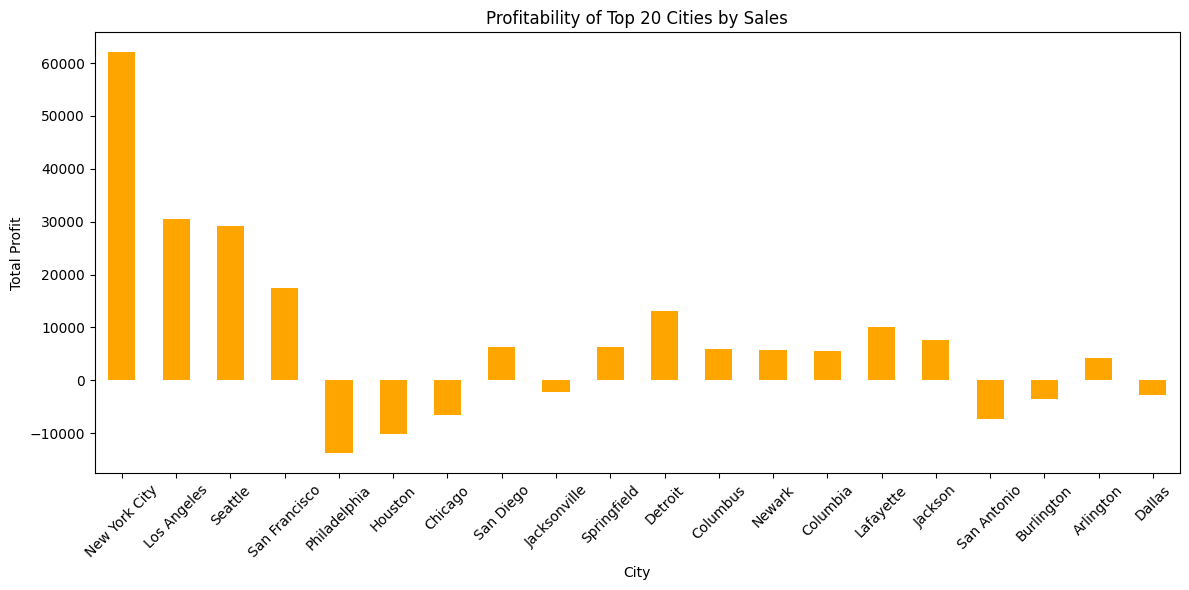

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top20_sales_cities['Profit'].plot(kind='bar', color='orange')
plt.title('Profitability of Top 20 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Aggregate total customers by sales
cust_sales = df.groupby('Customer Name')['Sales'].sum()
#Top 20 customers by Sales
top20_cust_sales = cust_sales.sort_values(ascending=False).head(20)
print(top20_cust_sales)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


In [29]:
import numpy as np
# Calculate cumulative sales and percentage of total sales
total_sales = cust_sales.sum()
cumulative_sales = cust_sales.cumsum()
cumulative_sales_percent = cumulative_sales / total_sales * 100
#Calculate percentage of customers
num_customers = len(cust_sales)
customers_percent = np.arange(1, num_customers + 1) / num_customers * 100


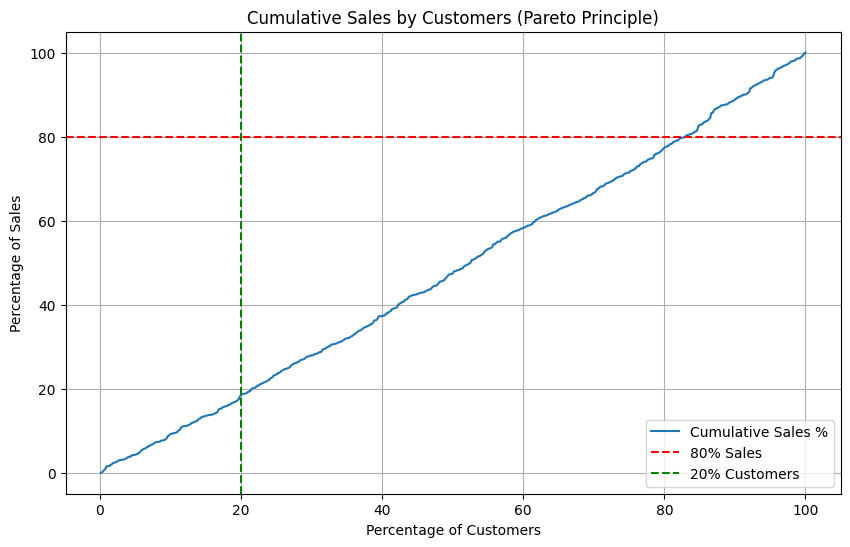

In [30]:
plt.figure(figsize=(10,6))
plt.plot(customers_percent, cumulative_sales_percent, label='Cumulative Sales %')

# Plot reference lines for Pareto principle (80% sales by 20% customers)
plt.axhline(80, color='red', linestyle='--', label='80% Sales')
plt.axvline(20, color='green', linestyle='--', label='20% Customers')

plt.xlabel('Percentage of Customers')
plt.ylabel('Percentage of Sales')
plt.title('Cumulative Sales by Customers (Pareto Principle)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Check if top 20% customers contribute ~80% sales
top_20_percent_count = int(num_customers * 0.20)
sales_top_20_percent = cust_sales.iloc[:top_20_percent_count].sum()
percent_contribution = sales_top_20_percent / total_sales * 100

print(f"Top 20% customers contribute {percent_contribution:.2f}% of total sales.")


Top 20% customers contribute 18.45% of total sales.


In [32]:
import pandas as pd

# Aggregate total sales and profit by state
state_stats = df.groupby('State')[['Sales', 'Profit']].sum()

# Define thresholds based on percentiles for categorization
sales_threshold_high = state_stats['Sales'].quantile(0.75)   # top 25% sales
profit_threshold_high = state_stats['Profit'].quantile(0.75) # top 25% profit

# Categorize states
high_sales_high_profit = state_stats[(state_stats['Sales'] >= sales_threshold_high) & (state_stats['Profit'] >= profit_threshold_high)]
high_sales_low_profit = state_stats[(state_stats['Sales'] >= sales_threshold_high) & (state_stats['Profit'] < profit_threshold_high)]
high_profit_low_sales = state_stats[(state_stats['Sales'] < sales_threshold_high) & (state_stats['Profit'] >= profit_threshold_high)]

print("=== High Sales & High Profit States (Priority 1) ===")
print(high_sales_high_profit.sort_values(by=['Sales', 'Profit'], ascending=False))

print("\n=== High Sales & Low Profit States (Investigate & Optimize) ===")
print(high_sales_low_profit.sort_values(by='Sales', ascending=False))

print("\n=== High Profit & Low Sales States (Niche Markets) ===")
print(high_profit_low_sales.sort_values(by='Profit', ascending=False))


# For each priority state, find top cities by sales and profit
print("\n=== Top Cities in Priority States ===")
for state in high_sales_high_profit.index:
    print(f"\nTop cities in {state}:")
    city_stats = df[df['State'] == state].groupby('City')[['Sales', 'Profit']].sum()
    top_cities = city_stats.sort_values(by=['Sales', 'Profit'], ascending=False).head(5)
    print(top_cities)

# Pareto Principle
cust_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
cust_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
total_profit = cust_profit.sum()
total_sales = cust_sales.sum()
num_customers = len(cust_profit)

top_20_pct_count = int(num_customers * 0.2)

profit_top_20_pct = cust_profit.iloc[:top_20_pct_count].sum()
sales_top_20_pct = cust_sales.iloc[:top_20_pct_count].sum()

print(f"\nTop 20% customers contribute {profit_top_20_pct / total_profit * 100:.2f}% of total profit.")
print(f"Top 20% customers contribute {sales_top_20_pct / total_sales * 100:.2f}% of total sales.")

print("\n=== Marketing Strategy Recommendations ===")
print("""
1. Invest marketing resources primarily in states with high sales and profit.
2. Investigate high sales but low profit states for pricing and cost optimizations.
3. Focus retention and growth strategies on high profit but low sales states.
4. Target top-performing cities within priority states with localized campaigns.
5. Engage top 20% customers who generate majority of sales and profit with personalized offers.
""")


=== High Sales & High Profit States (Priority 1) ===
                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486
Washington  138641.2700  33402.6517
Michigan     76269.6140  24463.1876
Virginia     70636.7200  18597.9504
Indiana      53555.3600  18382.9363
Georgia      49095.8400  16250.0433

=== High Sales & Low Profit States (Investigate & Optimize) ===
                      Sales      Profit
State                                  
Texas           170188.0458 -25729.3563
Pennsylvania    116511.9140 -15559.9603
Florida          89473.7080  -3399.3017
Illinois         80166.1010 -12607.8870
Ohio             78258.1360 -16971.3766
North Carolina   55603.1640  -7490.9122

=== High Profit & Low Sales States (Niche Markets) ===
                  Sales      Profit
State                              
Kentucky      36591.750  11199.6966
Minnesota     29863.150  10823.1874
Delaware      27451.069   9977.3748
Ne